In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, HuberRegressor, Ridge, ElasticNet
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

import warnings
warnings.filterwarnings('ignore')

### CSV fayllarni yuklab olamiz

In [551]:
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv", index_col=0)
sub = pd.read_csv("sample_submission.csv", index_col=0)

- **id**: Har bir qisqichbaqa uchun identifikator.
- **Sex**: Qisqichbaqaning jinsi (I - voyaga yetmagan, F - urg'ochi, M - erkak).
- **Length**: Qisqichbaqaning uzunligi.
- **Diameter**: Qisqichbaqaning diametri.
- **Height**: Qisqichbaqaning balandligi.
- **Weight**: Qisqichbaqaning umumiy vazni.
- **Shucked Weight**: Qobiq olib tashlanganidan keyingi vazn.
- **Viscera Weight**: Ichki organlarning vazni.
- **Shell Weight**: Qobiqlarning vazni.
- **Age**: Qisqichbaqaning taxminiy yoshi.


### Train.csv

In [552]:
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,0.5500,0.4125,0.1625,1.715145,0.609514,0.396893,0.566990,4.0
1,F,1.5125,1.2125,0.4000,31.312023,13.395139,6.265239,8.930093,10.0
2,F,1.5125,1.1750,0.4125,31.552993,14.670866,6.279414,9.922325,11.0
3,I,0.8000,0.6000,0.2000,4.620969,3.019222,0.978058,1.417475,7.0
4,I,1.3875,1.0875,0.3625,24.323871,11.651644,5.712424,5.386405,8.0


In [553]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             15000 non-null  object 
 1   Length          15000 non-null  float64
 2   Diameter        15000 non-null  float64
 3   Height          15000 non-null  float64
 4   Weight          15000 non-null  float64
 5   Shucked Weight  15000 non-null  float64
 6   Viscera Weight  15000 non-null  float64
 7   Shell Weight    15000 non-null  float64
 8   Age             15000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


In [554]:
train['Sex'].value_counts()

Sex
M           5387
I           5050
F           4562
Diameter       1
Name: count, dtype: int64

#### Diameter ustunini tashlab yuboramiz chunki bu xatolik tufayli datasetga tushib qolgan qiymat keyinchalik xatoliklatga sabab bo'lishi mumkin

In [555]:
train["Sex"] = train["Sex"].replace("Diameter", "I")

In [556]:
train['Sex'].value_counts()

Sex
M    5387
I    5051
F    4562
Name: count, dtype: int64

#### Statistik ma'lumotlarni chiqarib olamiz

In [557]:
train.describe()


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.314726,1.021937,0.346734,23.276184,10.054437,5.033064,6.664251,9.929533
std,0.289503,0.238511,0.091441,12.777945,5.671039,2.835873,3.601877,3.206668
min,0.225000,0.175000,0.000000,0.297670,0.099223,0.085048,0.099223,1.000000
25%,1.150000,0.875000,0.287500,13.168343,5.655725,2.792426,3.827183,8.000000
50%,1.375000,1.075000,0.362500,23.515910,9.879801,4.890289,6.803880,9.000000
75%,1.537500,1.200000,0.412500,32.162508,13.976304,7.002326,9.071840,11.000000
max,2.000000,1.575000,0.625000,80.101512,42.184056,16.300963,23.104843,29.000000


### Qisqichbaqa jinslarining vaznlariga nisbatan distributsiyalarini grafikda chiqarib olamiz

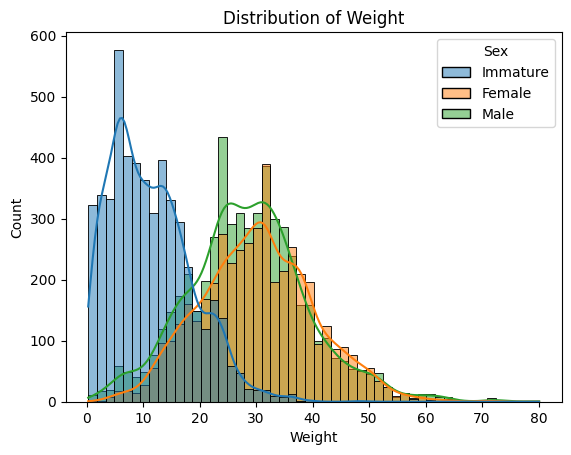

In [558]:
gender_mapping = {'M': 'Male', 'F': 'Female', 'I': 'Immature'}

sns.histplot(data=train, x='Weight', kde = True, hue=train['Sex'].map(gender_mapping))
plt.title('Distribution of Weight')
plt.show()

### Qisqichbaqalarning uzunliklarining yoshiga nisbatan bog;'liqligini ko'rib olamiz

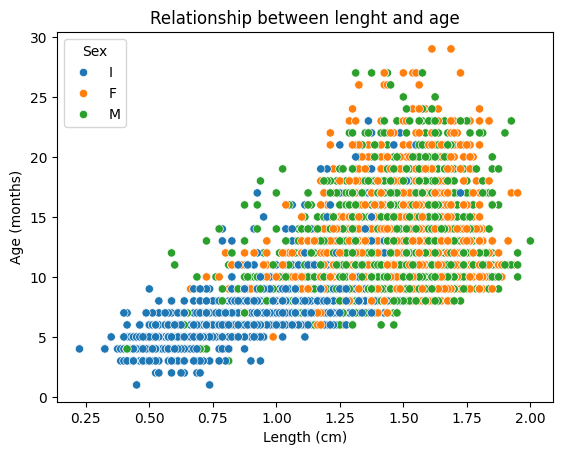

In [559]:
sns.scatterplot(data=train, x="Length", y="Age", hue="Sex")
plt.title('Relationship between lenght and age')
plt.xlabel('Length (cm)')
plt.ylabel('Age (months)')
plt.show()

### Qisqichbaqa yoshlarining distributsiyasini ko'rib olamiz

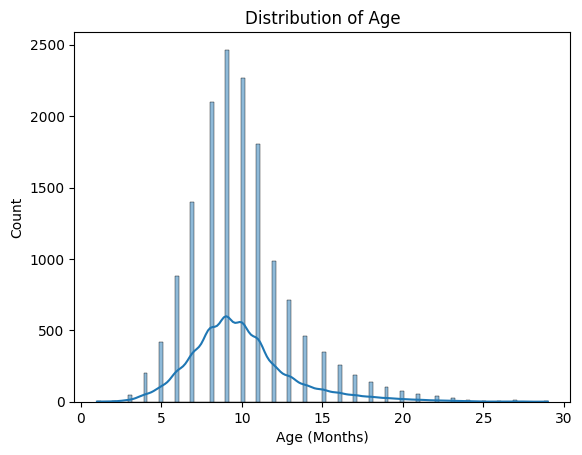

<Figure size 400x400 with 0 Axes>

In [560]:
sns.histplot(data=train, x="Age", kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age (Months)')
plt.ylabel('Count')
plt.figure(figsize=(4, 4))
plt.show()

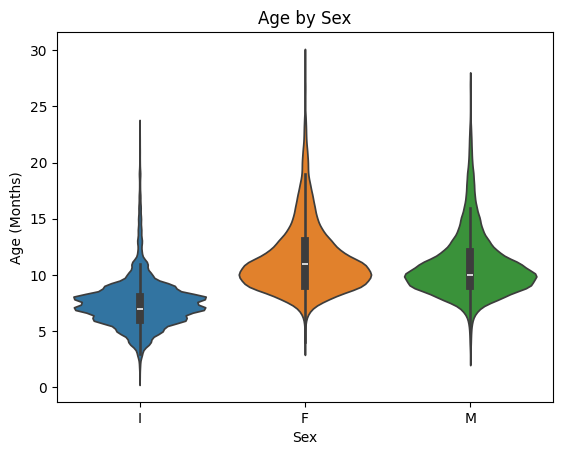

In [561]:
sns.violinplot(data=train, x="Sex", y="Age", hue = 'Sex')
plt.title('Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age (Months)')
plt.show()

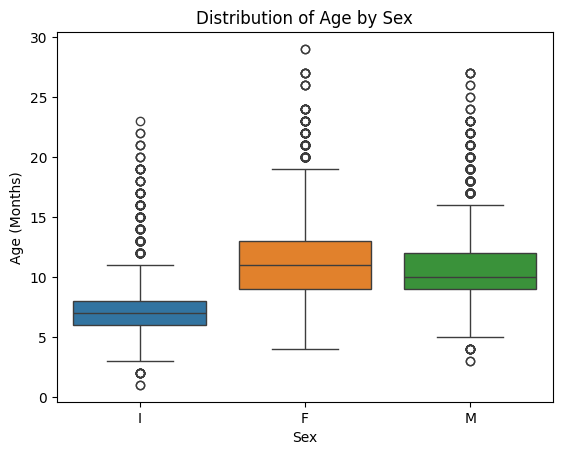

In [562]:
sns.boxplot(data=train, x="Sex", y="Age", hue = 'Sex')
plt.title('Distribution of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age (Months)')
plt.show()

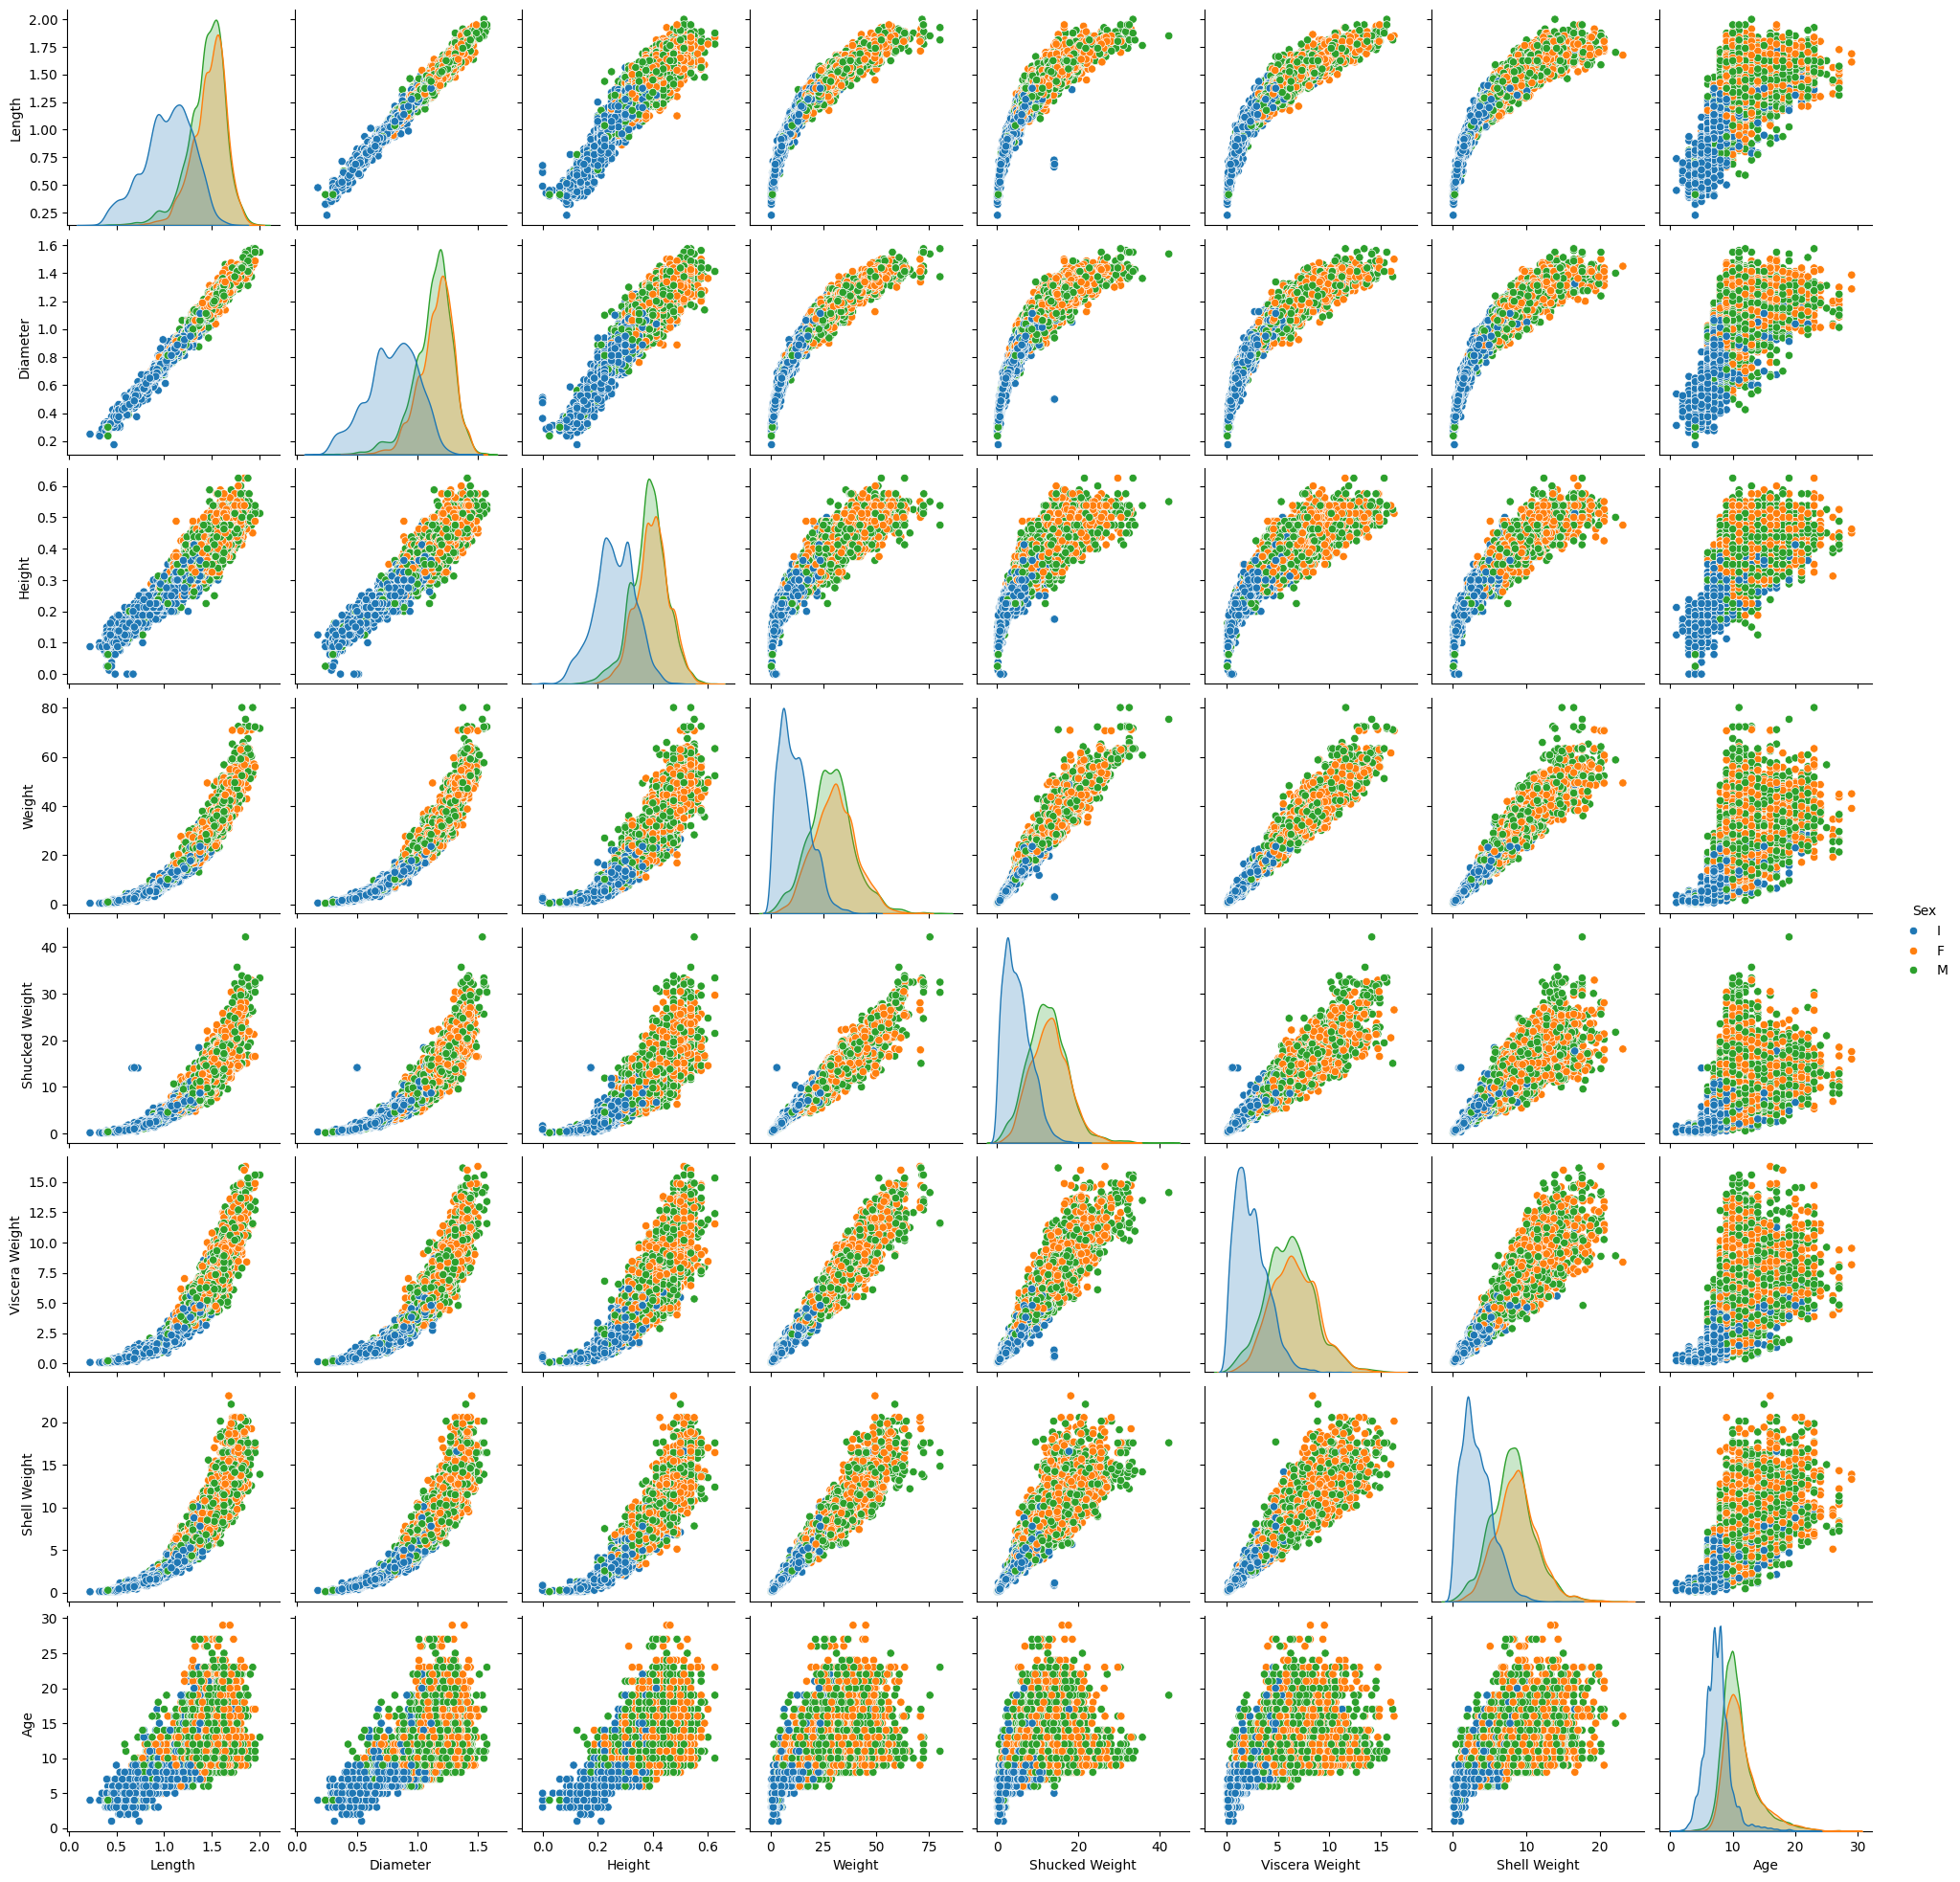

In [563]:
sns.pairplot(data=train, vars=train.select_dtypes('number').columns, hue='Sex')
plt.show()

#### Bizda kategorikal ustun bor buni Onehot encoding orqali numeric qilib olish uchun funksiya yozib olamiz

In [564]:
def encoder(df):
    enc = OneHotEncoder(sparse_output=False)
    enc_data = enc.fit_transform(df[["Sex"]])
    enc_df = pd.DataFrame(enc_data, columns=enc.get_feature_names_out(['Sex']), index=df.index)
    df = pd.concat([df, enc_df], axis=1)
    df.drop("Sex", axis=1, inplace=True)
    
    return df


### Train datasetni encode qilganimizdan keyin korrelatsiyalarini chiqarib olamiz

In [565]:
train = encoder(train)
test = encoder(test)

train.corr().style.background_gradient(cmap='coolwarm')

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
Length,1.000000,0.991985,0.937515,0.936790,0.913771,0.920313,0.919572,0.628870,0.362826,-0.683706,0.325589
Diameter,0.991985,1.000000,0.939571,0.938413,0.913195,0.920507,0.923940,0.635549,0.367181,-0.689084,0.326711
Height,0.937515,0.939571,1.000000,0.919799,0.878135,0.902474,0.922967,0.670477,0.366353,-0.676729,0.315334
Weight,0.936790,0.938413,0.919799,1.000000,0.970093,0.973898,0.967175,0.618143,0.362778,-0.669097,0.311244
Shucked Weight,0.913771,0.913195,0.878135,0.970093,1.000000,0.945081,0.908897,0.509258,0.335802,-0.637534,0.306020
Viscera Weight,0.920313,0.920507,0.902474,0.973898,0.945081,1.000000,0.938999,0.588998,0.365317,-0.665382,0.305150
Shell Weight,0.919572,0.923940,0.922967,0.967175,0.908897,0.938999,1.000000,0.685685,0.370470,-0.667136,0.301936
Age,0.628870,0.635549,0.670477,0.618143,0.509258,0.588998,0.685685,1.000000,0.308692,-0.532757,0.228801
Sex_F,0.362826,0.367181,0.366353,0.362778,0.335802,0.365317,0.370470,0.308692,1.000000,-0.471051,-0.494895
Sex_I,-0.683706,-0.689084,-0.676729,-0.669097,-0.637534,-0.665382,-0.667136,-0.532757,-0.471051,1.000000,-0.533388


In [566]:
def feature_engineering(df):
    df["Viscera Ratio"] = (df["Viscera Weight"] / df["Weight"])
    df["Shell-to-body Ratio"] = (df["Shell Weight"] / df["Weight"])
    df["Meat Yield"] = df["Shucked Weight"] / (df["Weight"] + df["Shell Weight"])
    df["Length-to-Diameter Ratio"] = (df["Length"] / df["Diameter"])
    df["Weight-to-VisceraWeight Ratio"] = (df["Weight"] / df["Viscera Weight"])
    df["Weight-to-ShellWeight Ratio"] = (df["Weight"] / df["Shell Weight"])
    df["Weight-to-ShuckedWeight Ratio"] = (df["Weight"] / df["Shucked Weight"])

    # Lengthni 4taga bo'lib olamiz
    df['Length_Bins'] = pd.qcut(df['Length'], q=4, labels=[1, 2, 3, 4])

    # BCI bu hayvonlarni sog'lomligini tekshirish uchun
    df['BCI'] = np.sqrt(df['Length'] * df['Weight'] * df['Shucked Weight'])
    df['Weight_wo_Viscera'] = (df['Shucked Weight'] - df['Viscera Weight'])
    df['Log Weight'] = np.log(df['Weight'] + 1)

    
    return df

- **Viscera Ratio**: Qisqichbaqaning ichki organlarining umumiy vaznga nisbati.
- **Shell-to-body Ratio**: Qobiqlarning qisqichbaqaning umumiy vazniga nisbati.
- **Meat Yield**: Shucked Weight (qobiqlardan ajratilgan vazn) ning umumiy vazn va qobiqlar yig'indisiga nisbati.
- **Length-to-Diameter Ratio**: Qisqichbaqaning uzunligi va diametrining nisbati.
- **Weight-to-VisceraWeight Ratio**: Qisqichbaqaning umumiy vaznining ichki organlarning vazniga nisbati.
- **Weight-to-ShellWeight Ratio**: Qisqichbaqaning umumiy vaznining qobiqlar vazniga nisbati.
- **Weight-to-ShuckedWeight Ratio**: Qisqichbaqaning umumiy vaznining qobiqlardan ajratilgan vaznga nisbati.
- **Length_Bins**: Qisqichbaqaning uzunligini 4 qismga ajratish orqali hosil qilingan bin (1, 2, 3, 4).
- **BCI**: Body Condition Index (BCI), qisqichbaqaning sog'lomligini aniqlash uchun hisoblanadigan ko'rsatkich.
- **Weight_wo_Viscera**: Ichki organlar chiqarib tashlanganidagi qisqichbaqaning vazni (Shucked Weight minus Viscera Weight).
- **Log Weight**: Qisqichbaqaning umumiy vaznining logarifmik shakli (log(Weight + 1)).


### Train dataset va Test datasetga yangi ustunlarni qo'shib olamiz

In [567]:
train = feature_engineering(train)
test = feature_engineering(test)


train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Length                         15000 non-null  float64 
 1   Diameter                       15000 non-null  float64 
 2   Height                         15000 non-null  float64 
 3   Weight                         15000 non-null  float64 
 4   Shucked Weight                 15000 non-null  float64 
 5   Viscera Weight                 15000 non-null  float64 
 6   Shell Weight                   15000 non-null  float64 
 7   Age                            15000 non-null  float64 
 8   Sex_F                          15000 non-null  float64 
 9   Sex_I                          15000 non-null  float64 
 10  Sex_M                          15000 non-null  float64 
 11  Viscera Ratio                  15000 non-null  float64 
 12  Shell-to-body Ratio            15000 

In [568]:
train.corr().style.background_gradient(cmap='coolwarm')

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M,Viscera Ratio,Shell-to-body Ratio,Meat Yield,Length-to-Diameter Ratio,Weight-to-VisceraWeight Ratio,Weight-to-ShellWeight Ratio,Weight-to-ShuckedWeight Ratio,Length_Bins,BCI,Weight_wo_Viscera,Log Weight
Length,1.000000,0.991985,0.937515,0.936790,0.913771,0.920313,0.919572,0.628870,0.362826,-0.683706,0.325589,0.024775,-0.205837,0.045233,-0.460390,-0.088327,0.176439,-0.098049,0.906966,0.920782,0.821446,0.983930
Diameter,0.991985,1.000000,0.939571,0.938413,0.913195,0.920507,0.923940,0.635549,0.367181,-0.689084,0.326711,0.021508,-0.196465,0.037910,-0.557876,-0.085202,0.167083,-0.088002,0.901377,0.920126,0.820228,0.983317
Height,0.937515,0.939571,1.000000,0.919799,0.878135,0.902474,0.922967,0.670477,0.366353,-0.676729,0.315334,0.029032,-0.124446,-0.007601,-0.485395,-0.086712,0.102308,-0.010278,0.860983,0.894252,0.773062,0.939402
Weight,0.936790,0.938413,0.919799,1.000000,0.970093,0.973898,0.967175,0.618143,0.362778,-0.669097,0.311244,0.008957,-0.240833,0.031096,-0.445222,-0.055360,0.228625,-0.038240,0.924570,0.991186,0.874920,0.922580
Shucked Weight,0.913771,0.913195,0.878135,0.970093,1.000000,0.945081,0.908897,0.509258,0.335802,-0.637534,0.306020,0.006786,-0.322091,0.185194,-0.421473,-0.053387,0.310404,-0.240858,0.903912,0.990245,0.955186,0.895500
Viscera Weight,0.920313,0.920507,0.902474,0.973898,0.945081,1.000000,0.938999,0.588998,0.365317,-0.665382,0.305150,0.188082,-0.241035,0.029555,-0.429363,-0.228876,0.225447,-0.038043,0.911111,0.966476,0.805981,0.900597
Shell Weight,0.919572,0.923940,0.922967,0.967175,0.908897,0.938999,1.000000,0.685685,0.370470,-0.667136,0.301936,0.002423,-0.030703,-0.049605,-0.456148,-0.048416,0.018396,0.059272,0.900978,0.943176,0.795695,0.904955
Age,0.628870,0.635549,0.670477,0.618143,0.509258,0.588998,0.685685,1.000000,0.308692,-0.532757,0.228801,-0.024298,0.126722,-0.192948,-0.360386,-0.010652,-0.132167,0.296106,0.569625,0.557407,0.388888,0.643909
Sex_F,0.362826,0.367181,0.366353,0.362778,0.335802,0.365317,0.370470,0.308692,1.000000,-0.471051,-0.494895,0.054240,-0.025962,-0.036941,-0.202349,-0.073551,0.018598,0.055826,0.357472,0.347462,0.277319,0.361421
Sex_I,-0.683706,-0.689084,-0.676729,-0.669097,-0.637534,-0.665382,-0.667136,-0.532757,-0.471051,1.000000,-0.533388,-0.076660,0.096434,0.032170,0.369726,0.114031,-0.084933,-0.043905,-0.661695,-0.646572,-0.552031,-0.686410


#### Modelimizni yaratishni boshlaymiz ya'ni target uchun Age ustunini olamiz

In [569]:
X = train.drop("Age", axis=1)
y = train["Age"]

#### Stacking orqali model yaratamiz

In [570]:
linear = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

lasso = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('lasso', Lasso(alpha=0.0008))
])

huber = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('huber', HuberRegressor())
])

ridge = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=4.2))
])

elastic = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('elastic_net', ElasticNet())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stacking = StackingRegressor(
    estimators=[
        ('linear', linear),
        ('lasso',lasso),
        ('huber', huber),
        ('ridge', ridge),
        ('elastic', elastic)
    ],
    final_estimator=HuberRegressor(max_iter=1000, epsilon=1.2, alpha=0.0001),
    cv=10
)

stacking.fit(X_train, y_train)

y_pred_test = stacking.predict(X_test)

mae = MAE(y_test, y_pred_test)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 1.2830260168708


In [571]:
y_pred = stacking.predict(X_test).round()
mae = MAE(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1.2513333333333334


### CSV filega natijani joylab olamiz

In [572]:
y_pred_final = stacking.predict(test).round()

sub = pd.read_csv('sample_submission.csv')

sub['Age'] = y_pred_final

sub.to_csv('Exam.csv', index=False)
sub

,id,Age
0,15000,6.0
1,15001,9.0
2,15002,6.0
3,15003,8.0
4,15004,6.0
...,...,...
9995,24995,9.0
9996,24996,8.0
9997,24997,10.0
9998,24998,9.0
